# Piecewise polynomials

In [1]:
%matplotlib inline
from scipy import interpolate
import numpy as np
import pylab as plt

plt.rcParams['savefig.dpi'] = 75;
plt.rcParams['figure.dpi']  = 200;
plt.tight_layout();
plt.rcParams['figure.figsize'] = 12, 4;

## Piecewise linear (affine) polynomials

$$\renewcommand{\R}{\mathbb{R}}$$

### Definition:

A *piecewise linear function* $s: [a,b]\rightarrow \R$ for a grid 
$a=x_0 < x_1 < \cdots < x_n = b$ has function values
$$s(x) = a_k x + b_k, \quad x\in[x_{k-1},x_k], \quad k=1,\ldots,n$$
where $a_k, b_k$ are constants

* for a general choice of $a_k, b_k$ the function $s(x)$ is not continuous
  and has jumps at the grid points

* in the following we consider *continuous functions* $s(x)$

* a grid is *equidistant* if 
    $$x_k = a + kh, \quad k=0,\ldots,n$$
    and $h = (b-a)/n$.



## pw linear interpolant

**Definition:**
Given $(x_k,y_k)$ for $k=0,\ldots,n$ with $x_0 < x_1 < \cdots < x_n$ the *linear interpolant* is
the continuous piecewise linear function $s(x)$ satisfying the interpolation conditions
    $$s(x_k) = y_k, \quad k=0,\ldots,n.$$
    
* the coefficients $a_k, b_k$ are obtained by solving an interpolation problem for every subinterval
    $[x_{k-1},x_k]$ and one gets
    $$\begin{bmatrix} 1 & x_{k-1} \\ 1 & x_k \end{bmatrix} 
      \begin{bmatrix} a_k \\ b_k \end{bmatrix} = \begin{bmatrix} y_{k-1} \\ y_k\end{bmatrix}$$
    and the coefficients are
    $$b_k = \frac{y_k-y_{k-1}}{x_k-x_{k-1}}, \quad
      a_k = y_k - b_k x_k = \frac{-y_k x_{k-1}+y_{k-1}x_k}{x_k-x_{k-1}}$$

## pw linear interpolant of $\sin(x)$

In [2]:
x = np.linspace(0, 2*np.pi, 9)
y = np.sin(x)

s = interpolate.InterpolatedUnivariateSpline(x, y, k=1)  
           # k=1: pw linear, s is a function

xnew = np.linspace(0,2*np.pi,100)

----------------------------

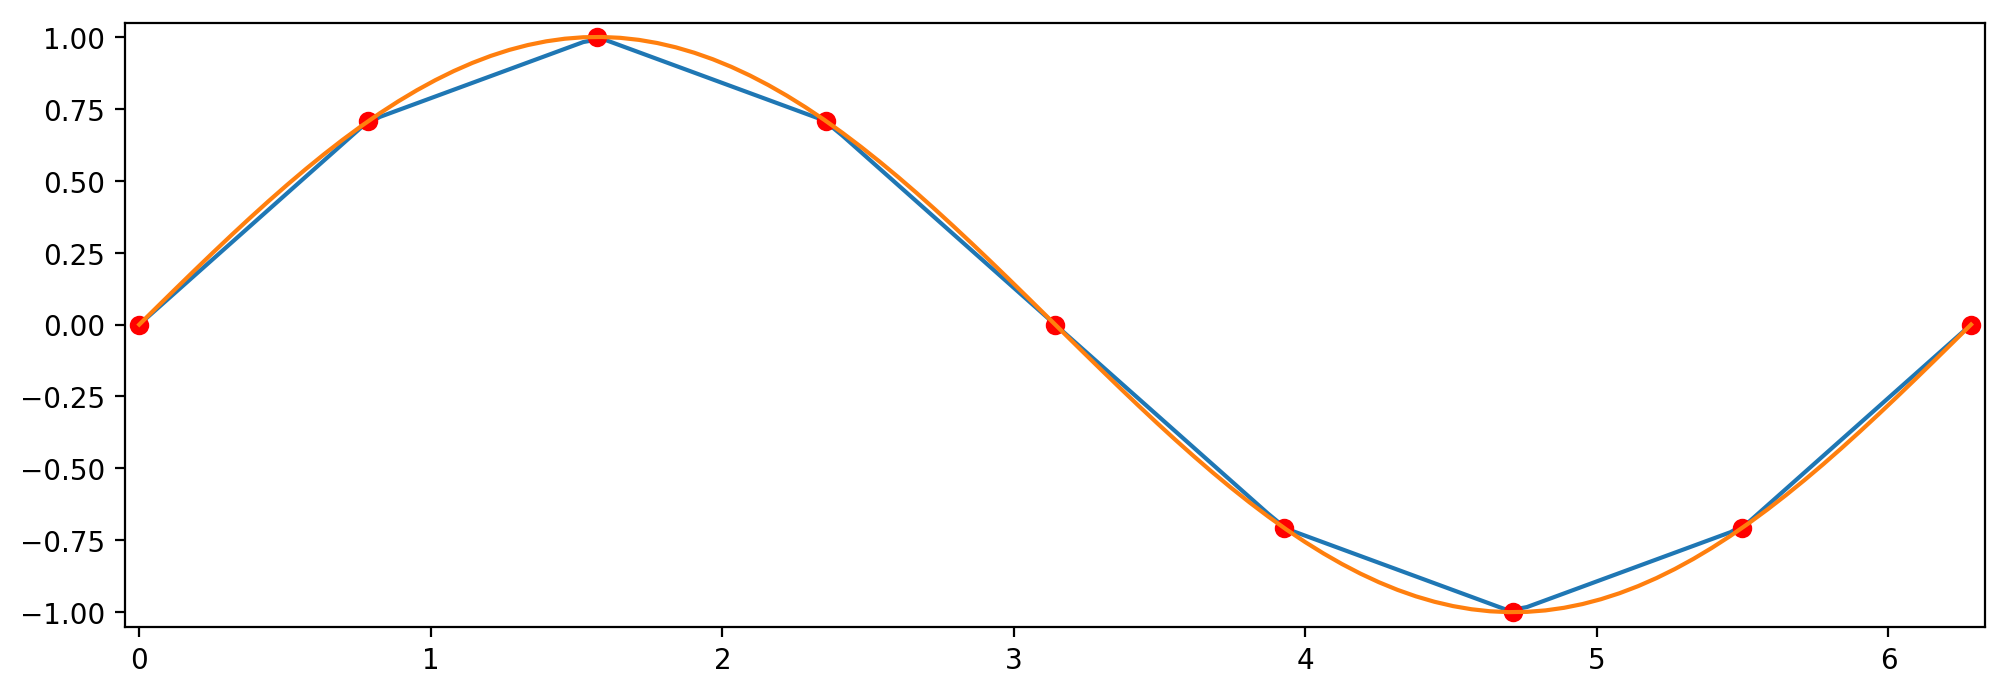

In [3]:
plt.plot(xnew, s(xnew), x,y,'ro',xnew,np.sin(xnew));
plt.axis([-0.05, 6.33, -1.05, 1.05]);

## hat function

we will use the function
$$h(x) = (1-|x|)_+, \quad x \in \R$$

where

* $|x|$ is the *absolute value* of $x$
* $(x)_+$ is the *positive value* of $x$ such that
    * $(x)_+ = x$ if $x\geq 0$
    * $(x)_+ = 0$ if $x < 0$

* one then has
    \begin{align*} x &= (x)_+ - (-x)_+ \\ |x| &= (x)_+ + (-x)_+ \end{align*}

## graph of hat function

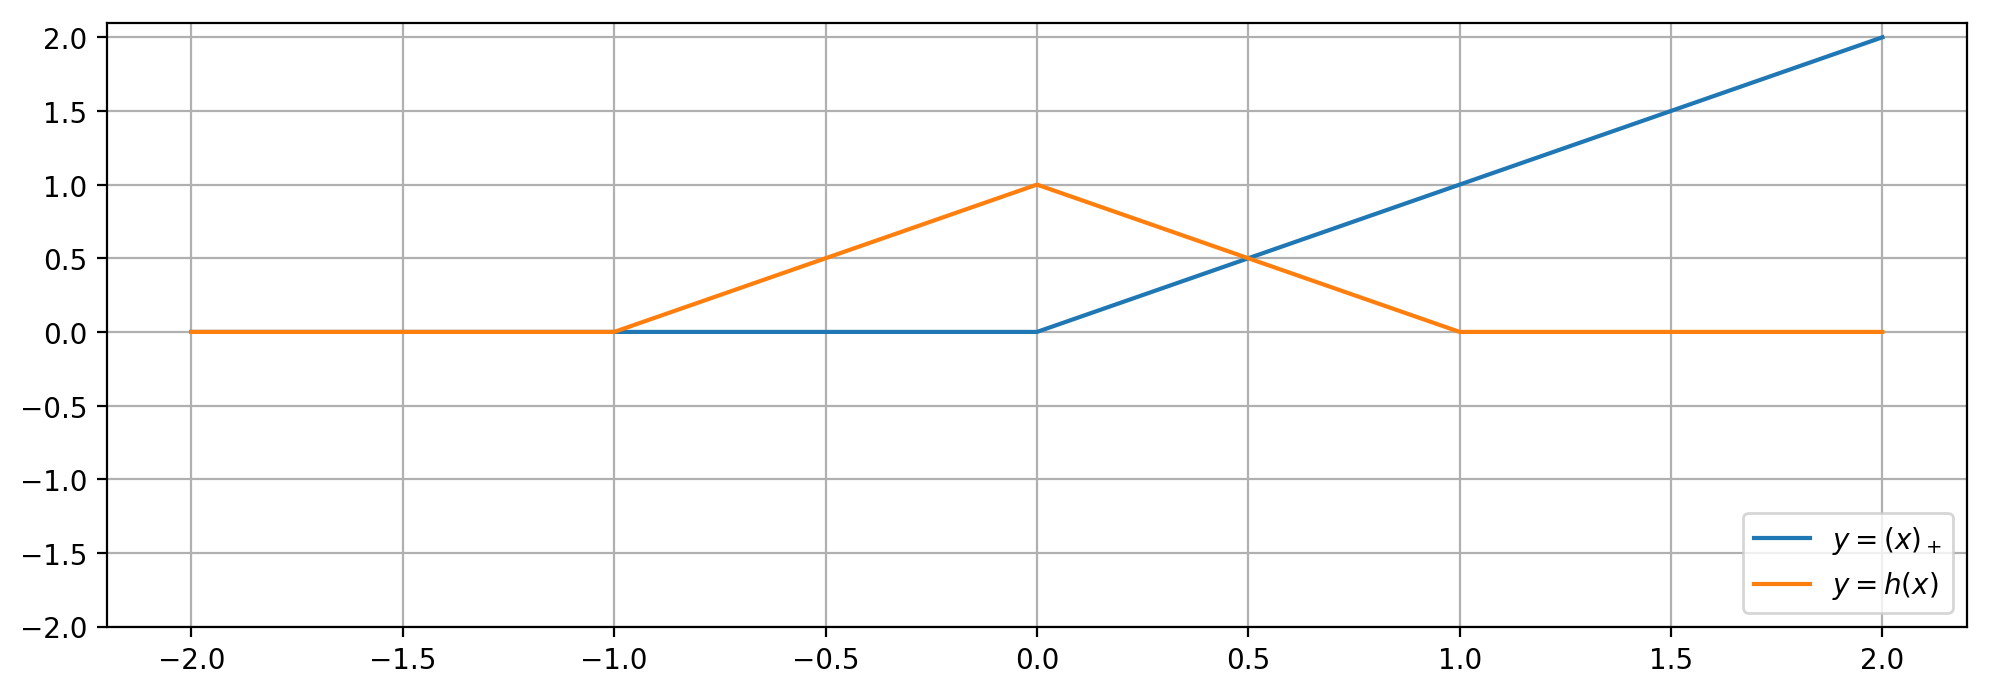

In [4]:
x  = np.linspace(-2,2,257)
plt.plot(x,np.maximum(x,0),label='$y=(x)_+$')
plt.plot(x,np.maximum(1-abs(x),0),label='$y=h(x)$')
plt.legend(loc=4);plt.grid('on');plt.axis(ymin=-2);

## representing the interpolant with hat functions

$$\renewcommand{\supp}{\operatorname{supp}}$$

* hat function $h(x/h - k)$ satisfies
  $$h(x_j/h - k) = \delta_{jk}$$
  for equidistant grid $x_k = k h$ where $h=1/n$ and $k=0,\ldots,n$
  
* interpolating $s(x)$ takes Lagrangian form:
  $$s(x) = \sum_{k=0}^n y_k h\left(\frac{x}{h} - k\right)$$
* hat functions are *nodal basis* $b_k(x) = h(x/h - k)$
* support  $\supp b_k = [(k-1)h,(k+1)h]$ thus $y_k$ affects $s$ only locally

## hierarchical basis

* using hat functions, one defines a Newton-style interpolation formula
* introduce two indices for grid points $x_{j,l}$ where $l$ is called level
* interval $[0,1]$:
  \begin{align*}
    x_{0,0} &= 0 & x_{1,0} & = 1 &                  &           \\
    x_{0,1} &= 0.5 &      &     &                     &        \\
    x_{0,2} & = 0.25 & x_{1,2} &= 0.75 &             &          \\
    x_{0,3} &= 0.125 & x_{1,3} &= 0.375 &  x_{2,3} &= 0.625 & x_{3,3} = 0.875                              
  \end{align*}
* basis functions:
  \begin{align*}
    b_{0,0}(x) &= 1 & b_{1,0}(x) & = x &                  &           \\
    b_{0,1}(x) &= h(2x-1) &      &     &                     &        \\
    b_{0,2}(x) &= h(4x-1) & b_{1,2}(x) &= h(4x-3) & &             &          \\
    b_{0,3}(x) &= h(8x-1) & b_{1,3}(x) &= h(8x-3) & b_{2,3}(x) &= \ldots &&
  \end{align*}

* for $l>1$ one has $b_{j,l}(x) = h(2^l x - 2 j - 1)$

## graphs of $b_{j,l}(x)$

## coefficients of interpolants

$$s(x) = c_{0,0} b_{0,0}(x) + c_{1,0} b_{1,0}(x) + \sum_{l=1}^m \sum_{j=0}^{2^{l-1}-1} c_{j,l} b_{j,l}(x)$$

where

  \begin{align*}
    c_{0,0} &= y_{0,0} & c_{1,0} & = y_{1,0} - y_{0,0} &                  &           \\
    c_{0,1} &= y_{0,1} - 0.5(y_{0,0} + y_{1,0}) &      &     &                     &        \\
    c_{0,2} &= y_{0,2} - 0.5(y_{0,0}+y_{0,1}) & c_{1,2} &= y_{1,2} - 0.5(y_{0,1}+y_{1,0}) &             &         \end{align*}

## minimisation property of piecewise linear function

**Proposition**

Let $s(x)$ be the piecewise linear interpolant of the points $(x_k,y_k), \quad k=0,\ldots,n$ and
$g(x)$ be any continuous function with $g(x_k) = y_k$ which is continuously differentiable in each
subintervall $(x_{k-1},x_k)$ then

   $$\int_{x_0}^{x_n} s^\prime(x)^2\, dx \leq \int_{x_0}^{x_n} g^\prime(x)^2\, dx.$$
   
*Proof.* Calculus of variation, show this is true for $C^2$ functions, then take the limit.

* thus $s$ minimises the average squared change of the function.

## Cubic splines

**Proposition**

Consider the class $V$ of functions which are continuous and $C^2$ on each interval $[x_{k-1},x_k]$. Then
there exists a function $s(x)$ in that class which interpolates $s(x_k)=y_k$, for $k=0,\ldots,n$ which satisfies

   $$\int_{x_0}^{x_n} s^{\prime\prime}(x)^2\, dx \leq \int_{x_0}^{x_n} g^{\prime\prime}(x)^2\, dx.$$

for all $g\in V$ which interpolate $g(x_k) = y_k$ for $k=0,\ldots,n$.

This function $s$ is called the cubic spline interpolant, it is continuously differentiable and is a 
piecewise cubic polynomial.

*Proof.* similar as for piecewise linear interpolant.

* the cubic spline minimises the average squared second derivative which is a substitute for the curvature
* this cubic spline has zero second derivative at the boundary, an alternative is to impose values of the first 
   or second derivative on the boundary

<!--

## 3.1.4.2 Cubic Splines

are piecewise cubic polynomials $S\in C^2$, i.e., they are twice differentiable and have a continuous second derivative $S^{\prime\prime}(x)$. $$S(x)=S_i(x),\quad x_i\leq x\leq x_{i+1},\quad 0\leq i<n.$$ The interpolation conditions are $$S_i(x_i)=y_i,\quad S_i(x_{i+1})=y_{i+1},\qquad 0\leq i<n.$$

### Example Cubic Spline

To simplify the calculations lets assume that $$S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2+d_i(x-x_i)^3.$$ As the cubic spline shown in the previous example must pass through the knots we know that $$S_i(x_i) = y_i \quad (= a_i)$$ and $$S_i(x_{i+1}) = y_{i+1}.$$ The smoothness condition ($S\in C^2$) also needs to be enforced as $$S'_i(x_{i+1}) = S'_{i+1}(x_{i+1})$$ and $$S''_i(x_{i+1}) = S''_{i+1}(x_{i+1}).$$

This system can be used to find $a_i$, $b_i$, $c_i$ and $d_i$.

It turns out that just using Equations, and results in an under-determined system, appropriate boundary conditions make the system well-posed.

### Natural Splines

or splines are characterised by their zero second derivative boundary conditions $$S^{\prime\prime}(x_0) = S^{\prime\prime}(x_n) = 0.$$

### Clamped Splines

When the spline is to be used to interpolate a function $f(x)$ an alternative choice of boundary conditions is to specify the derivative of the spline function to match that of $f$ at the endpoints: 
$$S^{\prime}(x_0) = f^{\prime}(x_0), \qquad S^{\prime}(x_n) = f^{\prime}(x_n).$$ This is called a clamped spline.

When the function $f$ or its derivatives are not known, they can be approximated from the data itself. Thus a generalisation of the last condition is 
$$S^{\prime}(t_0) = d_0, \qquad S^{\prime}(t_n) = d_n$$ for some approximations of the derivatives.

Though the algorithm for natural cubic spline interpolation is widely available in software, it is worth knowing the details. In particular, it is then easy to consider minor changes, like different conditions at the end points.

-->
## Scipy cubic spline interpolant

* cannot see the difference between the interpolant and the exact function in the plot!

In [5]:
# Cubic spline (Lagrange) interpolation from Scipy

from scipy import interpolate
from scipy.interpolate import CubicSpline

x = np.linspace(0, 2*np.pi, 9)
y = np.sin(x)
s = CubicSpline(x, y, bc_type="natural")  # natural boundary conditions cubic spline
xnew = np.linspace(0,2*np.pi,100)

----------------------------------

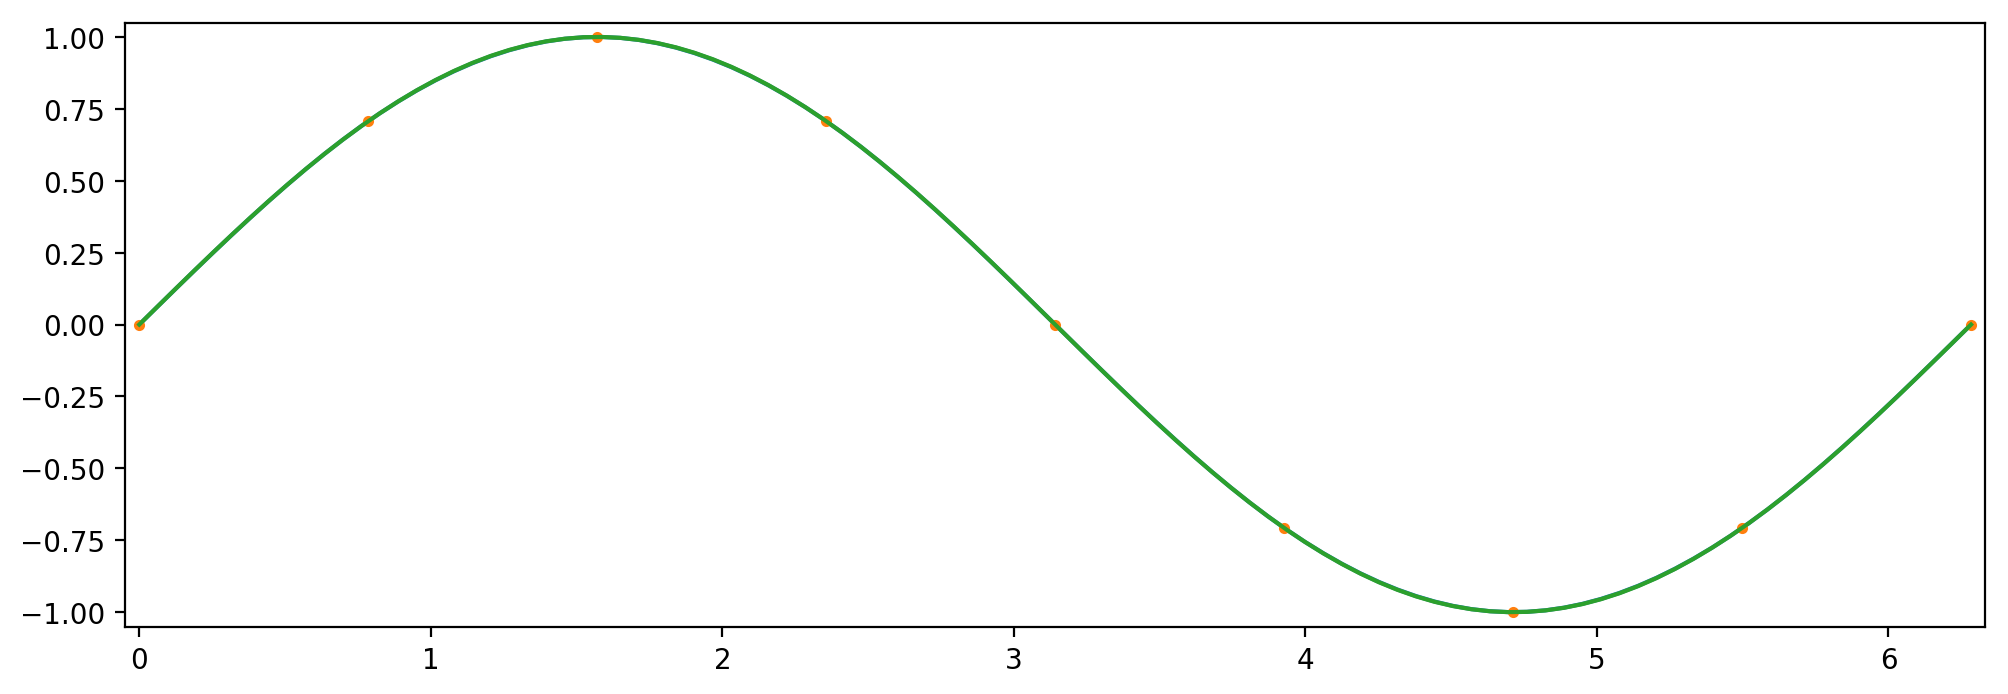

In [6]:
plt.plot(xnew, s(xnew), x,y,'.',xnew,np.sin(xnew));
plt.axis([-0.05, 6.33, -1.05, 1.05]);

##  Hermite Interpolation with Piecewise Cubic Functions

* Hermite interpolant $H(x)$ of a function $f(x)$ satisfies:

    * interpolation condition for function value at $x_k$
    * interpolation condition for derivative at $x_k$
   
* This gives for conditions per interval $[x_{i-1},x_i]$:

$$\begin{aligned}
  H(x_i) =f(x_i)=y_i,&&\,H^{\prime }(x_i)=f^{\prime }(x_i)=y_i^{\prime } \\
  H(x_{i+1}) =f(x_{i+1})=y_{i+1},&&\,H^{\prime }(x_{i+1})=f^{\prime }(x_{i+1})=y_{i+1}^{\prime }
\end{aligned}$$ 

* These conditions uniquely determine the polynomials of degree three in the intervals

## Parametrisation

$$H_i(x)=a_i+b_i(x-x_i)+(x-x_i)^2[c_i+d_i(x-x_{i+1})]$$ 

* With $h_i=x_{i+1}-x_i$ the four interpolation conditions give 

  $$\begin{aligned}
    a_i &=y_i,\hfill  & b_i&=y_i^{\prime }, \\
    c_i &=\frac{y_{i+1}-y_i}{h_i^2}-\frac{y_i^{\prime }}{h_i},\hfill
    & d_i &=\frac{y_{i+1}^{\prime}+y_i^{\prime }}{h_i^2}-\frac{2(y_{i+1}-y_i)}{h_i^3}
 \end{aligned}$$

* Approximation often similar to the B-spline interpolant